In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pickle

# Import data from Task A in current configuration
Task_A_Data = pd.read_csv('../data/task-data/task-A.csv')
print(Task_A_Data.shape)
print(Task_A_Data.columns)

Task_A_Data_X = Task_A_Data.iloc[:,3:]
print(Task_A_Data_X.shape)
print(Task_A_Data_X.columns)

Task_A_Data_Y = Task_A_Data.iloc[:,1]
print(Task_A_Data_Y.shape)
print(Task_A_Data_Y.sample(n=5))

/var/folders/q0/qj0r7jj952ngj7mn6px78_gw0000gn/T/ipykernel_7168/894192956.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


(15384, 16)
Index(['image_matrix', 'disaster', 'label', 'height', 'width', 'aspect_ratio',
       'total_pixels', 'avg_pixel_int', 'lbp_var', 'lbp_mean', 'sobel_mean',
       'gabor_7_var', 'gabor_3_var', 'area of red pixels at 150 threshold',
       'area of green pixels at 150 threshold',
       'area of blue pixels at 150 threshold'],
      dtype='object')
(15384, 13)
Index(['height', 'width', 'aspect_ratio', 'total_pixels', 'avg_pixel_int',
       'lbp_var', 'lbp_mean', 'sobel_mean', 'gabor_7_var', 'gabor_3_var',
       'area of red pixels at 150 threshold',
       'area of green pixels at 150 threshold',
       'area of blue pixels at 150 threshold'],
      dtype='object')
(15384,)
9256     midwest-flooding
12151    midwest-flooding
14475    midwest-flooding
13197    midwest-flooding
4663           socal-fire
Name: disaster, dtype: object


In [2]:
# Optimal_pipe is the model, using the same data 
# I recreated the current config for comparison


optimal_pipe = Pipeline([('scaler', StandardScaler()),
                         ('svc', LinearSVC(C=10, max_iter=1000))]) # default penalty is 'l2'

X_train, X_val, y_train, y_val = train_test_split(Task_A_Data_X, Task_A_Data_Y, test_size=0.2, random_state=42)
optimal_pipe.fit(X_train, y_train)
svc_train_preds = optimal_pipe.predict(X_train)
svc_train_score = optimal_pipe.score(X_train, y_train)
svc_val_preds = optimal_pipe.predict(X_val)
svc_val_score = optimal_pipe.score(X_val, y_val)
svc_cv_score = cross_val_score(optimal_pipe, Task_A_Data_X, Task_A_Data_Y, cv=10)
print(f'Initial training score: {svc_train_score}')
print(f'Initial validation score: {svc_val_score}')
print(f'Average cross-validation score across 10 folds: {svc_cv_score.mean()}')

Initial training score: 0.9809051759161452
Initial validation score: 0.9788755281117972
Average cross-validation score across 10 folds: 0.9817988476464967


In [3]:
# RF dumped into task_A_model

optimal_pipe = Pipeline([('scaler', StandardScaler()),
                         ('rfc', RandomForestClassifier(max_depth=10, max_features='sqrt', n_estimators=10, random_state=42))])

X_train, X_val, y_train, y_val = train_test_split(Task_A_Data_X, Task_A_Data_Y, test_size=0.2, random_state=42)
optimal_pipe.fit(X_train, y_train)
rfc_train_preds = optimal_pipe.predict(X_train)
rfc_train_score = optimal_pipe.score(X_train, y_train)
rfc_val_preds = optimal_pipe.predict(X_val)
rfc_val_score = optimal_pipe.score(X_val, y_val)
rfc_cv_score = cross_val_score(optimal_pipe, Task_A_Data_X, Task_A_Data_Y, cv=10)
print(f'Initial training score: {rfc_train_score}')
print(f'Initial validation score: {rfc_val_score}')
print(f'Average cross-validation score across 10 folds: {rfc_cv_score.mean()}')

Initial training score: 0.9949622166246851
Initial validation score: 0.9808254793630159
Average cross-validation score across 10 folds: 0.9849190234653242


In [4]:
# Import data from Task A in current configuration
Task_A_Complete_Data = pd.read_csv('../data/task-data/complete_df_test.csv')
print(Task_A_Complete_Data.shape)
print(Task_A_Complete_Data.columns)

Task_A_Complete_Data_X = Task_A_Complete_Data.iloc[:,2:-2]
print(Task_A_Complete_Data_X.shape)
print(Task_A_Complete_Data_X.columns)

Task_A_Complete_Data_Y = Task_A_Complete_Data.iloc[:,0]
print(Task_A_Complete_Data_Y.shape)
# print(Task_A_Complete_Data_Y.sample(n=5))

(15384, 40)
Index(['disaster', 'label', 'height', 'width', 'aspect_ratio', 'total_pixels',
       'avg_pixel_int', 'area of red pixels at 150 threshold',
       'area of green pixels at 150 threshold',
       'area of blue pixels at 150 threshold', 'sobel_mean', 'sobel_var',
       'gabor_0_mean', 'gabor_0_var', 'gabor_1_mean', 'gabor_1_var',
       'gabor_2_mean', 'gabor_2_var', 'gabor_3_mean', 'gabor_3_var',
       'gabor_4_mean', 'gabor_4_var', 'gabor_5_mean', 'gabor_5_var',
       'gabor_6_mean', 'gabor_6_var', 'gabor_7_mean', 'gabor_7_var',
       'gabor_8_mean', 'gabor_8_var', 'gabor_9_mean', 'gabor_9_var',
       'gabor_10_mean', 'gabor_10_var', 'gabor_11_mean', 'gabor_11_var',
       'lbp_mean', 'lbp_var', 'disaster.1', 'damage_label'],
      dtype='object')
(15384, 36)
Index(['height', 'width', 'aspect_ratio', 'total_pixels', 'avg_pixel_int',
       'area of red pixels at 150 threshold',
       'area of green pixels at 150 threshold',
       'area of blue pixels at 150 thresho

In [5]:
for col in Task_A_Complete_Data_X.columns:
    print(col)
    print(Task_A_Complete_Data_X[col].dtype)

height
int64
width
int64
aspect_ratio
float64
total_pixels
int64
avg_pixel_int
float64
area of red pixels at 150 threshold
float64
area of green pixels at 150 threshold
float64
area of blue pixels at 150 threshold
float64
sobel_mean
float64
sobel_var
float64
gabor_0_mean
float64
gabor_0_var
float64
gabor_1_mean
float64
gabor_1_var
float64
gabor_2_mean
float64
gabor_2_var
float64
gabor_3_mean
float64
gabor_3_var
float64
gabor_4_mean
float64
gabor_4_var
float64
gabor_5_mean
float64
gabor_5_var
float64
gabor_6_mean
float64
gabor_6_var
float64
gabor_7_mean
float64
gabor_7_var
float64
gabor_8_mean
float64
gabor_8_var
float64
gabor_9_mean
float64
gabor_9_var
float64
gabor_10_mean
float64
gabor_10_var
float64
gabor_11_mean
float64
gabor_11_var
float64
lbp_mean
float64
lbp_var
float64


In [6]:
scaler = StandardScaler()
scaled_Task_A_Complete_Data_X = scaler.fit_transform(Task_A_Complete_Data_X)

# Check if there are any NaNs left
if np.isnan(scaled_Task_A_Complete_Data_X).any():
    print("NaNs remain in the dataset.")
    mask = ~np.isnan(scaled_Task_A_Complete_Data_X).any(axis=1)
    cleaned_scaled_Task_A_Complete_Data_X  = scaled_Task_A_Complete_Data_X[mask]
    cleaned_Task_A_Complete_Data_Y  = Task_A_Complete_Data_Y[mask]
    print("Original features shape:", scaled_Task_A_Complete_Data_X.shape)
    print("Shape of cleaned features:", cleaned_scaled_Task_A_Complete_Data_X.shape)
    print("Shape of cleaned labels:", cleaned_Task_A_Complete_Data_Y.shape)

    pca = PCA(n_components=0.99)
    pca.fit(cleaned_scaled_Task_A_Complete_Data_X)
    pca_cleaned_scaled_Task_A_Complete_Data_X = pca.transform(cleaned_scaled_Task_A_Complete_Data_X)
else:
    print("No NaNs in the dataset. Proceeding with PCA.")
    pca = PCA(n_components=0.95)
    pca.fit(scaled_Task_A_Complete_Data_X)
    pca_cleaned_scaled_Task_A_Complete_Data_X = pca.transform(scaled_Task_A_Complete_Data_X)

NaNs remain in the dataset.
Original features shape: (15384, 36)
Shape of cleaned features: (11151, 36)
Shape of cleaned labels: (11151,)


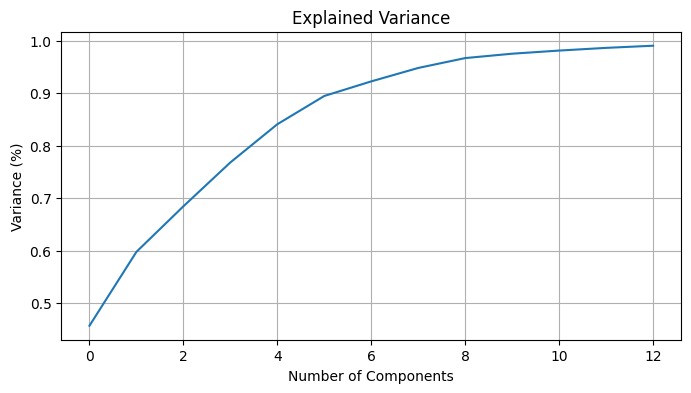

In [7]:
# Plotting the Cumulative Summation of the Explained Variance
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')  # for each component
plt.title('Explained Variance')
plt.grid(True)
plt.show()

In [8]:
# Recreate the SVC model with PCA data to compare

optimal_pipe = Pipeline([('scaler', StandardScaler()),
                         ('svc', LinearSVC(C=10, max_iter=1000))]) # default penalty is 'l2'

X_train, X_val, y_train, y_val = train_test_split(pca_cleaned_scaled_Task_A_Complete_Data_X, cleaned_Task_A_Complete_Data_Y, test_size=0.2, random_state=42)
optimal_pipe.fit(X_train, y_train)
svc_train_preds = optimal_pipe.predict(X_train)
svc_train_score = optimal_pipe.score(X_train, y_train)
svc_val_preds = optimal_pipe.predict(X_val)
svc_val_score = optimal_pipe.score(X_val, y_val)
svc_cv_score = cross_val_score(optimal_pipe, pca_cleaned_scaled_Task_A_Complete_Data_X, cleaned_Task_A_Complete_Data_Y, cv=10)
print(f'Initial training score: {svc_train_score}')
print(f'Initial validation score: {svc_val_score}')
print(f'Average cross-validation score across 10 folds: {svc_cv_score.mean()}')

Initial training score: 0.9834080717488789
Initial validation score: 0.976692066337965
Average cross-validation score across 10 folds: 0.9831399778195669


In [9]:
# Recreate the RF model with PCA data to compare
optimal_pipe = Pipeline([('scaler', StandardScaler()),
                         ('rfc', RandomForestClassifier(max_depth=10, max_features='sqrt', n_estimators=10, random_state=42))])

X_train, X_val, y_train, y_val = train_test_split(pca_cleaned_scaled_Task_A_Complete_Data_X, cleaned_Task_A_Complete_Data_Y, test_size=0.2, random_state=42)
optimal_pipe.fit(X_train, y_train)
rfc_train_preds = optimal_pipe.predict(X_train)
rfc_train_score = optimal_pipe.score(X_train, y_train)
rfc_val_preds = optimal_pipe.predict(X_val)
rfc_val_score = optimal_pipe.score(X_val, y_val)
rfc_cv_score = cross_val_score(optimal_pipe, pca_cleaned_scaled_Task_A_Complete_Data_X, cleaned_Task_A_Complete_Data_Y, cv=10)
print(f'Initial training score: {rfc_train_score}')
print(f'Initial validation score: {rfc_val_score}')
print(f'Average cross-validation score across 10 folds: {rfc_cv_score.mean()}')

Initial training score: 0.9955156950672646
Initial validation score: 0.9757956073509637
Average cross-validation score across 10 folds: 0.9791044248356557
